In [39]:
import os
import pandas as pd
# from tensorflow.keras.models import load_model
import pickle
import torch
from train_radioMap import RegressionModel
import numpy as np

from matplotlib import pyplot as plt



log_dir = '../../model/project_209/model_1/log_2'
data = pd.read_csv('../../data/project_144/data.csv', index_col=0)

model = torch.load(os.path.join(log_dir, 'model.pth'))

# device = 'cuda'
model.to('cpu')


data_x = torch.tensor(data.iloc[:, 2:6].to_numpy())
data_y = torch.tensor(data.iloc[:, 7:8].to_numpy())

scaler_x = torch.load(open(os.path.join(log_dir, 'scaler_x.pth'), 'rb'))
scaler_y = torch.load(open(os.path.join(log_dir, 'scaler_y.pth'), 'rb'))

model.eval()

scalered_x = torch.tensor(scaler_x.transform(data_x)).float()
# scaler_x.to(device)

predict_scalered_y = model(scalered_x)

# predict_y = scaler_y.inverse_transform(predict_scalered_y)
a = predict_scalered_y.detach().numpy()
predict_y = scaler_y.inverse_transform(a)
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(predict_y, data_y))

/home/wyuhui/.conda/envs/rem/lib/python3.9/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


7.446008225942851

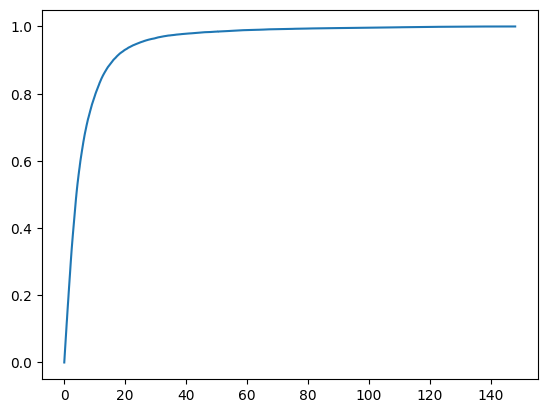

In [40]:
data_y = data.iloc[:, 7:8].to_numpy()

err = predict_y - data_y
err = err.T[0]
err.sort()
err = abs(err)
err.sort()
rate = 0.0
err = err[:int((1-rate) * len(err))]

cdf = np.arange(1, len(err) + 1) / len(err)
plt.plot(err, cdf)
plt.show()